# Using Autoencoders

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
train_df = pd.read_csv("../data/nyc_taxi.csv")
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df.set_index(train_df['timestamp'], inplace=True)

In [10]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_df[["value"]])
model = Sequential([
    Dense(4, activation='relu', input_shape=(1,)),
    Dense(2, activation='relu'),
    Dense(4, activation='relu'),  
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train, epochs=200, batch_size=32, verbose=1)


Epoch 1/200


d:\anomlay detection\myenv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0465
Epoch 2/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0124  
Epoch 3/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032
Epoch 4/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0366e-04
Epoch 5/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2463e-06
Epoch 6/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.4734e-06 
Epoch 7/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4128e-06
Epoch 8/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6470e-06
Epoch 9/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0443e-06
Epoch 10/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5360e-06
Epoch 11/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0842e-06
Epoch 12/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7773e-06  
Epoch 13/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5498e-06
Epoch 14/200
323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3123e-06
Epoch 

In [11]:
X_train_pred = model.predict(X_train)
reconstruction_error = np.abs(X_train_pred - X_train).flatten()
train_df['reconstruction_error'] = reconstruction_error
threshold = reconstruction_error.mean() + 3 * reconstruction_error.std()
train_df['anomaly_hidden'] = reconstruction_error > threshold
train_df['label_hidden'] = train_df['anomaly_hidden'].map({True:'Anomaly', False:'Normal'})


323/323 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


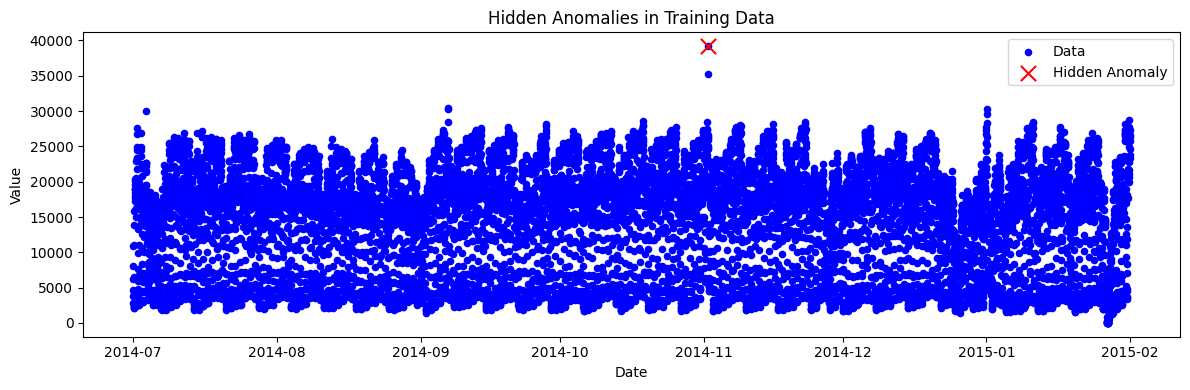

In [12]:
plt.figure(figsize=(12,4))
plt.scatter(train_df.index, train_df['value'], color='blue', s=20, label='Data')
plt.scatter(
    train_df.loc[train_df['anomaly_hidden']].index,
    train_df.loc[train_df['anomaly_hidden'], 'value'],
    s=120, marker='x', color='red', label='Hidden Anomaly'
)
plt.title('Hidden Anomalies in Training Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()